In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('prior_data.csv')
df.head()

,dnu,numax,eps,d02,alpha,env_height,env_width,mode_width,teff,bp_rp
0,0.797313,1.849061,1.042422,-0.083138,-2.013106,1.117461,0.949266,-0.951869,3.692062,1.319325
1,0.613473,1.621688,0.932101,-0.293549,-1.886150,0.891196,0.796977,-1.005161,3.677316,1.413556
2,0.559830,1.422844,0.831581,-0.242940,-1.465383,0.308770,0.689412,-0.851908,3.691585,1.330576
3,0.871902,1.971060,1.024286,-0.083248,-2.069506,0.749085,1.140958,-0.620151,3.703231,1.167095
4,0.574075,1.472324,0.759243,-0.220728,-2.064063,0.755530,0.589592,-1.139218,3.679067,1.404783


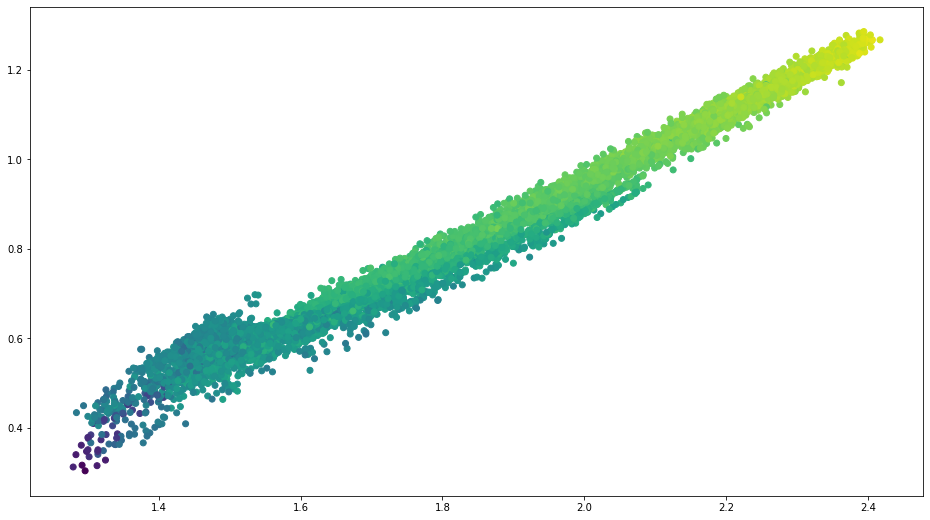

In [3]:
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(df.numax, df.dnu, c=df.eps)

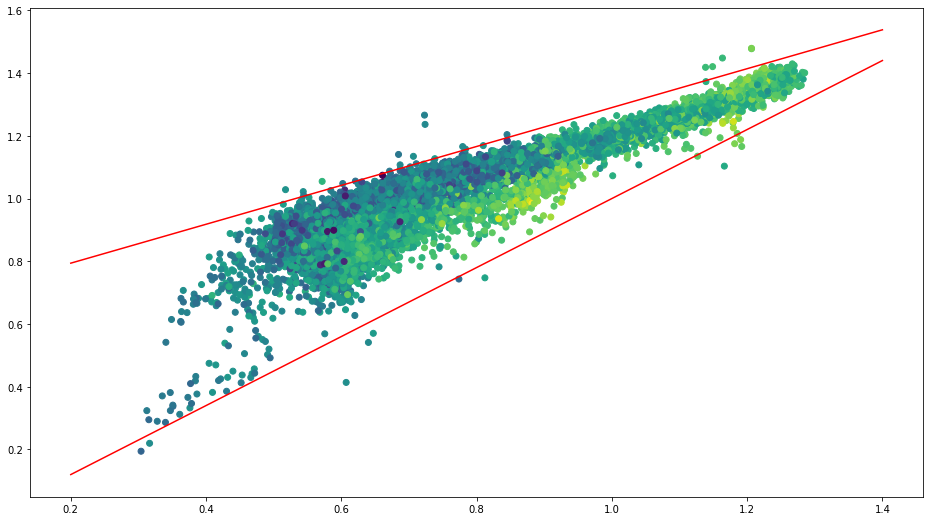

In [4]:
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(df.dnu, df.eps, c=df.teff)
ddnu = np.linspace(0.2, 1.4, 1000)
u = [0.62, 0.67]
ax.plot(ddnu, np.poly1d(u)(ddnu), c='r')
l = [1.1, -0.1]
ax.plot(ddnu, np.poly1d(l)(ddnu), c='r')

In [5]:
print(f'Total stars: {len(df)}')
df_cut = df.loc[df.eps < np.poly1d(u)(df.dnu)]
print(f'Total stars now: {len(df_cut)}')
df_cut = df_cut.loc[df_cut.eps > np.poly1d(l)(df_cut.dnu)]
print(f'Total stars now: {len(df_cut)}')

Total stars: 12208
Total stars now: 12187
Total stars now: 12175


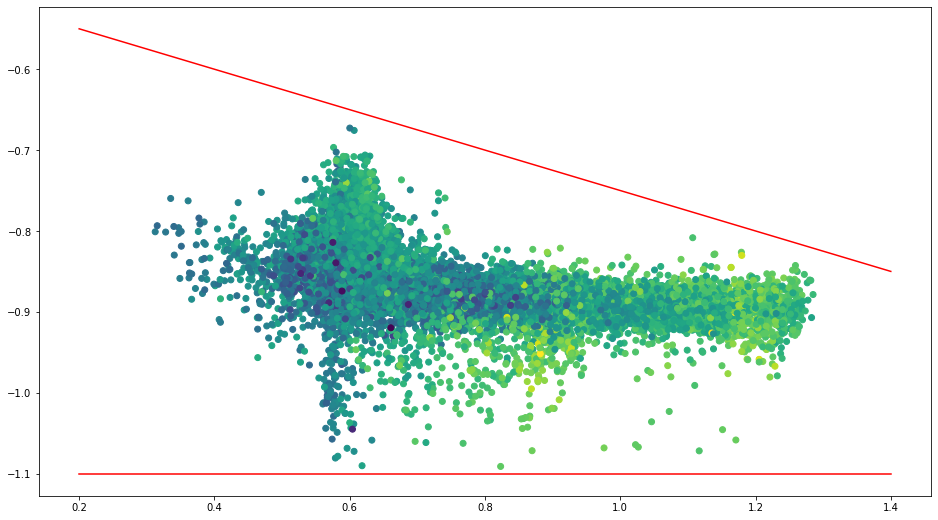

In [11]:
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(df_cut.dnu, df_cut.d02-df_cut.dnu, c=df_cut.teff)
ddnu = np.linspace(0.2, 1.4, 1000)
u = [-0.25, -0.5]
ax.plot(ddnu, np.poly1d(u)(ddnu), c='r')
l = [-0.0, -1.1]
ax.plot(ddnu, np.poly1d(l)(ddnu), c='r')

In [12]:
print(f'Total stars was: {len(df_cut)}')
df_cut = df_cut.loc[df_cut.d02 - df_cut.dnu < np.poly1d(u)(df_cut.dnu)]
print(f'Total stars now: {len(df_cut)}')
df_cut = df_cut.loc[df_cut.d02 - df_cut.dnu > np.poly1d(l)(df_cut.dnu)]
print(f'Total stars now: {len(df_cut)}')

Total stars was: 12168
Total stars now: 12168
Total stars now: 12168


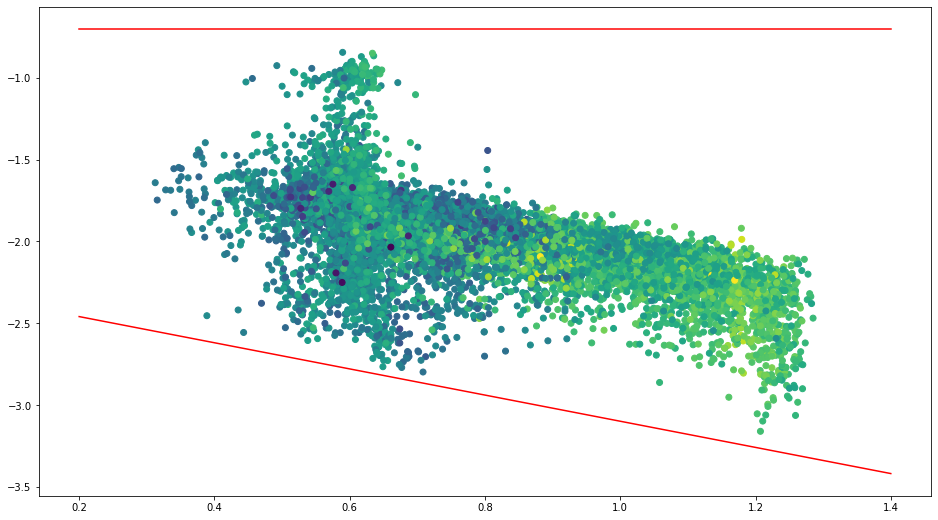

In [13]:
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(df_cut.dnu, df_cut.alpha, c=df_cut.teff)
ddnu = np.linspace(0.2, 1.4, 1000)
u = [-0.0, -0.7]
ax.plot(ddnu, np.poly1d(u)(ddnu), c='r')
l = [-0.8, -2.3]
ax.plot(ddnu, np.poly1d(l)(ddnu), c='r')

In [14]:
print(f'Total stars was: {len(df_cut)}')
df_cut = df_cut.loc[df_cut.alpha < np.poly1d(u)(df_cut.dnu)]
print(f'Total stars now: {len(df_cut)}')
df_cut = df_cut.loc[df_cut.alpha > np.poly1d(l)(df_cut.dnu)]
print(f'Total stars now: {len(df_cut)}')

Total stars was: 12168
Total stars now: 12168
Total stars now: 12168


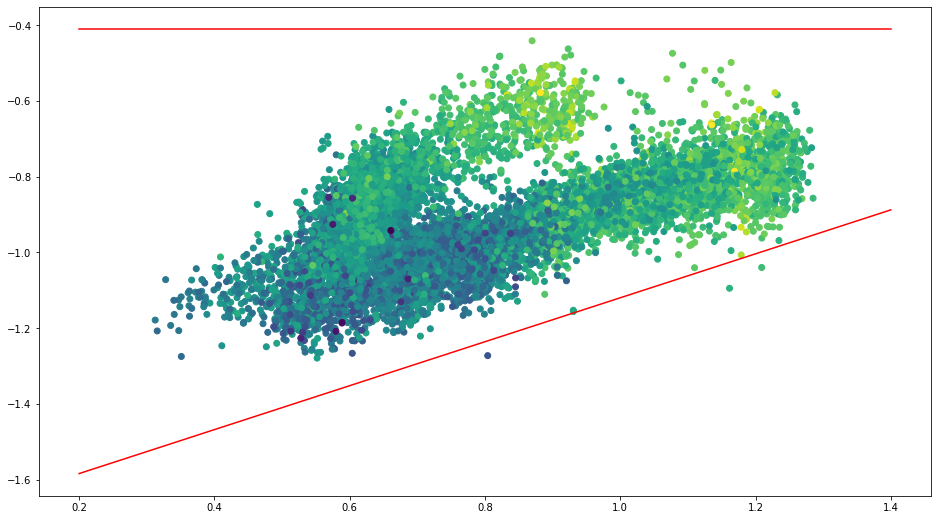

In [21]:
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(df_cut.dnu, df_cut.mode_width, c=df_cut.teff)
ddnu = np.linspace(0.2, 1.4, 1000)
u = [-0.0, -0.41]
ax.plot(ddnu, np.poly1d(u)(ddnu), c='r')
l = [0.58, -1.7]
ax.plot(ddnu, np.poly1d(l)(ddnu), c='r')

In [22]:
print(f'Total stars was: {len(df_cut)}')
df_cut = df_cut.loc[df_cut.mode_width < np.poly1d(u)(df_cut.dnu)]
print(f'Total stars now: {len(df_cut)}')
df_cut = df_cut.loc[df_cut.mode_width > np.poly1d(l)(df_cut.dnu)]
print(f'Total stars now: {len(df_cut)}')

Total stars was: 12168
Total stars now: 12168
Total stars now: 12165


In [ ]:
df_cut.to_csv('prior_data.csv', index=False)